# PyTorch Workflow

Let's explore an example of PyTorch end-to-end  workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version - https://www.learnpytorch.io/01_pytorch_workflow/


In [58]:
what_were_covering = {
    1: "data (prepare and load)",
    2: 'build model',
    3: "fitting the model to data (training)",
    4: "making prediction and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [59]:
import torch
from torch import nn # nn contains all the PyTorch's building block for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

## Data (preparing adn loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Vidoes
* Audio
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representations
2. Build a model to learn patterns in that numerical representations

To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with *known* **parameter**

In [60]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
#Y= b      * X + a
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [61]:
len(X), len(y)

(50, 50)

### Spliting data into training and test set (one of the most important concepts in machine learnin in general)

Let's create a training and test data set with our data

In [62]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualize our data?

"Visualize, Visualize, Visualize"!

In [63]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares prediction.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data' )

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    # Are there predictions
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # show predictions
    plt.legend(prop={"size": 14})

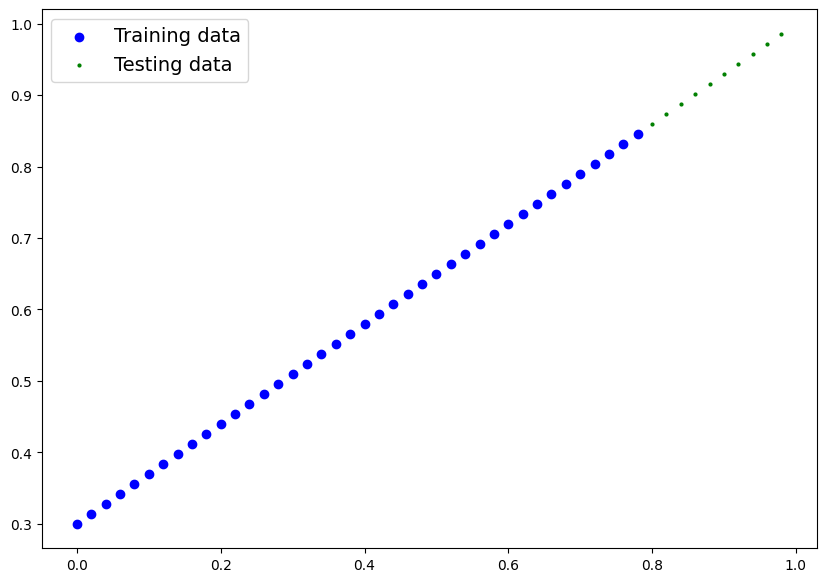

In [64]:
plot_predictions()

## 2.  Build model

My first pytorch model

Linear regression

Y = b      * X + a

⬇️ ⬇️     ⬇️  ⬇️

y = weight * X + bias



b = weight

X = Input

a = bias

Y = Output


so in essence we have a data of X and it corresponding output Y. and we want to traing a model to learn this pattern of data such that in given an input X, it can predict Y by itself after learning patterns in the dada


Recommended OOP in Python resource from real Python: https://realpython.com/python3-object-oriented-programming/



nn.Module -> https://pytorch.org/docs/stable/generated/torch.nn.Module.html



#### What our model does:
* Start with random value(weight & bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

#### How does it do so?
Through two main algorithms: 3Blue1Brown Deep Learning series
1. Gradient descent <- READ ON THIS
2. Backpropagation <- READ ON THIS

In [65]:
torch.rand(10, 5)

tensor([[0.3904, 0.6009, 0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936, 0.8694, 0.5677],
        [0.7411, 0.4294, 0.8854, 0.5739, 0.2666],
        [0.6274, 0.2696, 0.4414, 0.2969, 0.8317],
        [0.1053, 0.2695, 0.3588, 0.1994, 0.5472],
        [0.0062, 0.9516, 0.0753, 0.8860, 0.5832],
        [0.3376, 0.8090, 0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644, 0.7104, 0.9464],
        [0.7890, 0.2814, 0.7886, 0.5895, 0.7539],
        [0.1952, 0.0050, 0.3068, 0.1165, 0.9103]])

In [66]:
torch.nn.init.xavier_normal_

<function torch.nn.init.xavier_normal_(tensor: torch.Tensor, gain: float = 1.0, generator: Optional[torch._C.Generator] = None) -> torch.Tensor>

In [67]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch from nn.Module
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                dtype=float)) # <- datatype torch.float32

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=float)) # <- datatype torch.float32

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
        return self.weights * x + self.bias # linear regression formula



### PyTorch model building essentials

* `torch.nn` - contains al the building for computational graphs (a neural networks)
* `torch.nn.Parameters` - what parameters should out model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - base classfor all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclass requires you to overwrite `forward()`, this method defines what happens in the forward computation
* `torch.utils.data.Dataset`
* `torch.utils.data.DataLoader`

See more on PyTorch cheatsheet -> https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the content of our Pytorch model

Now we've created a model, let's see what's inside

So we can check out our odel paramerter  or what's inside our model using `.parameter()`

In [68]:
# Create a random seed
torch.manual_seed(42)

# Creat an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out the parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [69]:
# List names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### making prediction using `torch.inference_mode()`

to check our model's predictive power,  let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [70]:
# Make prediction with mode
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

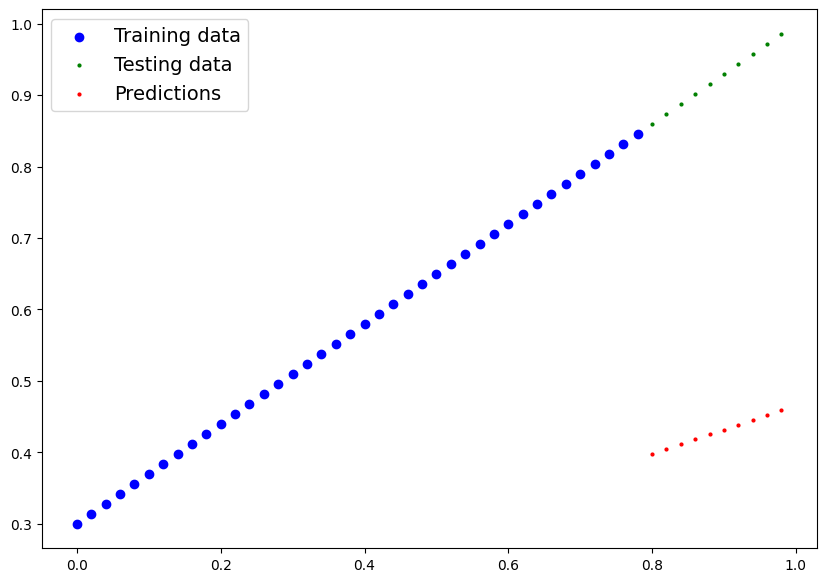

In [71]:
plot_predictions(predictions=y_preds)

## 3.  Train Model

The whole idea of training is for a model to move from some *unknown* parameter to some *known* parameters

Or in other words from a poor representation to a better representation of the data

One way to measure how poor or how wrong your model predictions are is to use a loss function

* Note: Loss functio may also be called cost function or criterion in diff areas. For our use case we'll use loss function

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal output, lower is better
* **Optimizer**: takes into account the loss of a model and adjusts the model's parameters (eg weight & bias in our case) to improve the loss function. Read `torch.optim` on pytorch's website
    * Inside the optimiser you'll often have to set 2 paramerter:
        * `params` - the model you'd like to optimize, for eg `params=model_0.parameters()`
        * `lr`(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` is small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [72]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [73]:
# Setup a loss function
"""
Creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y
"""
loss_fn = nn.L1Loss()

# Setup optimizer (stochastic gradient descent)

optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01 )# lr = # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### Building a training loop (and a testing loop) in a PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data through our model's `forward()` function) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradient of each of the parameters of out moel with respect to the loss (**backpropagation**)
4. Optimizer step - use the optimizer to adjust the model's parameter to try and improve the loss (**gradient descent**)

In [74]:
torch.manual_seed(42)

# an epoch is one loop through the data... (this is a hyperparamter because we've set it)
epochs = 200

##track different values
epoch_count = []
loss_values = []
test_loss_values = []

### training
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameter that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3.  Optimizer zero grad --> set gradient values to zero so that we can recalculate for another epoch. Else the values will keep accumulating
    optimizer.zero_grad()

    # 4. Perform backpropagation on th loss with respect to the parameter of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above for next iteration of the loop

    ### Testing
    model_0.eval() # turns off different setting in the model not needed for evaluation /testing
    with torch.inference_mode(): # this turn of gradient tracking & couple of more things behind the scenes
    #with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
        # 1. Do forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    # print out what's happenin'
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        
        # print out model state
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288135683755547 | Test loss: 0.4810651841540759
OrderedDict([('weights', tensor([0.3406], dtype=torch.float64)), ('bias', tensor([0.1388], dtype=torch.float64))])
Epoch: 10 | Loss: 0.1976713574739093 | Test loss: 0.346355184508239
OrderedDict([('weights', tensor([0.3796], dtype=torch.float64)), ('bias', tensor([0.2388], dtype=torch.float64))])
Epoch: 20 | Loss: 0.08908721056311557 | Test loss: 0.21729648486064157
OrderedDict([('weights', tensor([0.4184], dtype=torch.float64)), ('bias', tensor([0.3333], dtype=torch.float64))])
Epoch: 30 | Loss: 0.05314849742260115 | Test loss: 0.14464008519991425
OrderedDict([('weights', tensor([0.4512], dtype=torch.float64)), ('bias', tensor([0.3768], dtype=torch.float64))])
Epoch: 40 | Loss: 0.04543793101588776 | Test loss: 0.11360938544629148
OrderedDict([('weights', tensor([0.4748], dtype=torch.float64)), ('bias', tensor([0.3868], dtype=torch.float64))])
Epoch: 50 | Loss: 0.041678606478126046 | Test loss: 0.09919938569279392
Ord

In [75]:
import numpy as np

In [76]:
# epoch_count, 
# loss_values, 
test_loss_values

[tensor(0.4811, dtype=torch.float64),
 tensor(0.3464, dtype=torch.float64),
 tensor(0.2173, dtype=torch.float64),
 tensor(0.1446, dtype=torch.float64),
 tensor(0.1136, dtype=torch.float64),
 tensor(0.0992, dtype=torch.float64),
 tensor(0.0889, dtype=torch.float64),
 tensor(0.0806, dtype=torch.float64),
 tensor(0.0723, dtype=torch.float64),
 tensor(0.0647, dtype=torch.float64),
 tensor(0.0565, dtype=torch.float64),
 tensor(0.0482, dtype=torch.float64),
 tensor(0.0406, dtype=torch.float64),
 tensor(0.0323, dtype=torch.float64),
 tensor(0.0241, dtype=torch.float64),
 tensor(0.0165, dtype=torch.float64),
 tensor(0.0082, dtype=torch.float64),
 tensor(0.0050, dtype=torch.float64),
 tensor(0.0050, dtype=torch.float64),
 tensor(0.0050, dtype=torch.float64)]

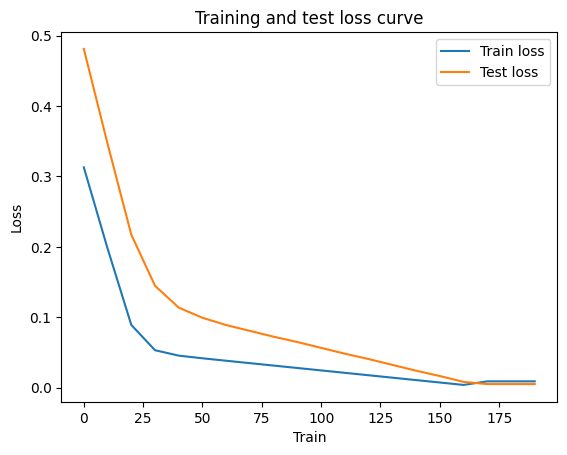

In [77]:

# plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Train")
plt.legend()

In [78]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [79]:
weight, bias

(0.7, 0.3)

#### Before training... model starting with random input to change itself to get itself close the ideal result

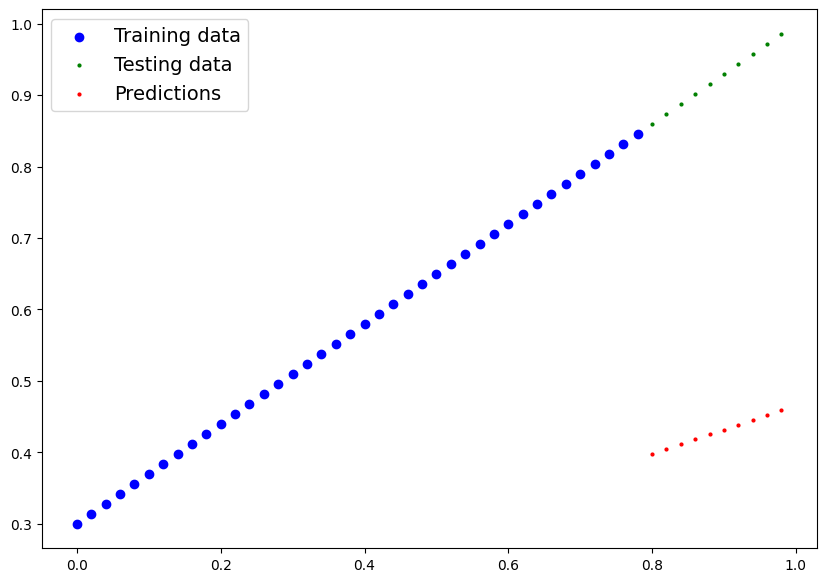

In [80]:
plot_predictions(predictions=y_preds)

In [81]:
with torch.inference_mode(): # this turn of gradient tracking & couple of more things behind the scenes
#with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do forward pass
    y_preds_1 = model_0(X_test)

#### After 1st training, result of test

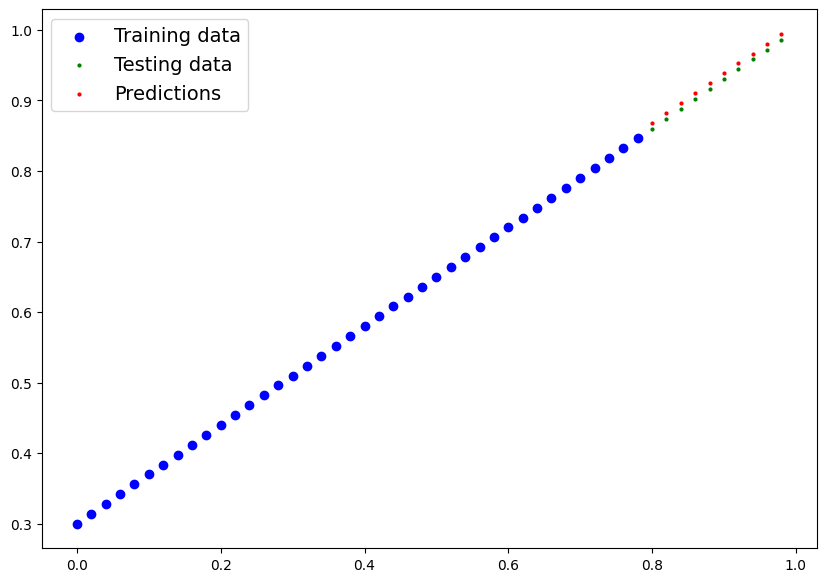

In [82]:
plot_predictions(predictions=y_preds_1)

In [83]:
with torch.inference_mode(): # this turn of gradient tracking & couple of more things behind the scenes
    # 1. Do forward pass
    y_preds_2 = model_0(X_test)

#### After 2nd training, result of test

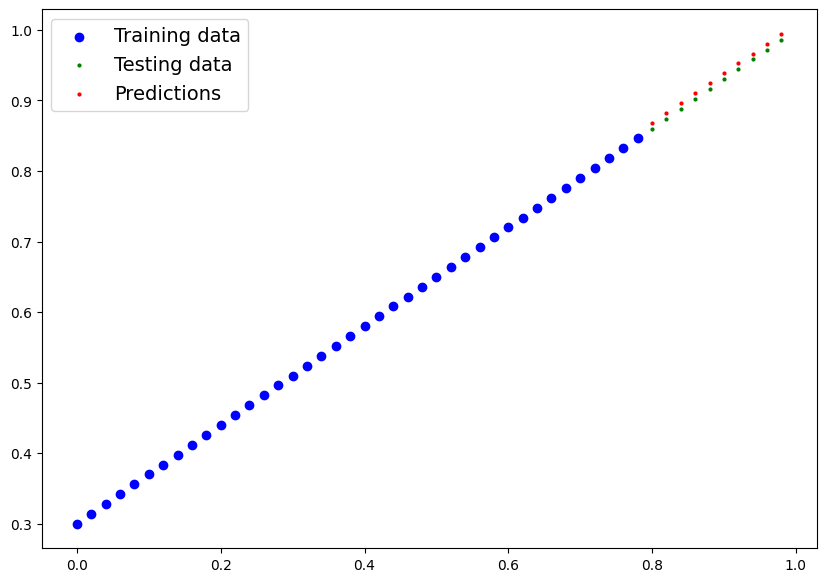

In [84]:
plot_predictions(predictions=y_preds_2)

#### After 3rd training, result of test

In [85]:
with torch.inference_mode(): # this turn of gradient tracking & couple of more things behind the scenes
#with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do forward pass
    y_preds_3 = model_0(X_test)

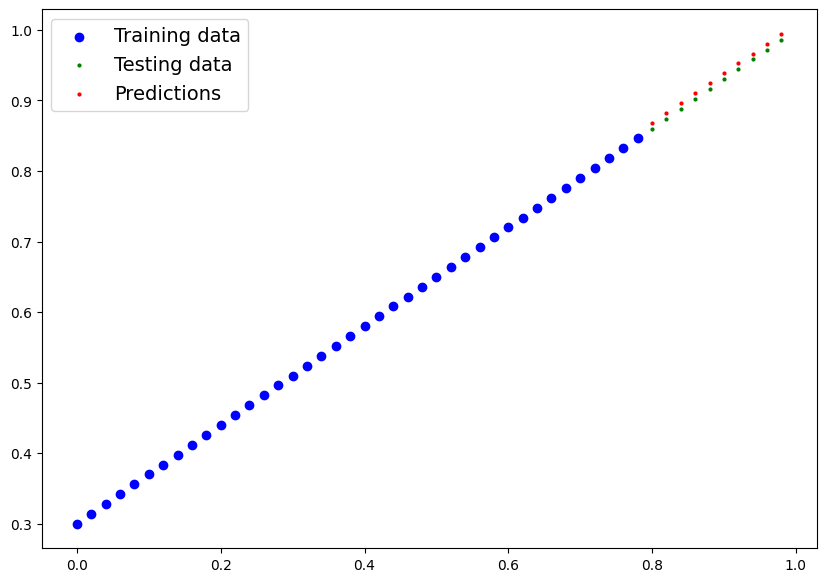

In [86]:
plot_predictions(predictions=y_preds_3)

In [87]:
y_preds_1, y_test

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]], dtype=torch.float64),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [88]:
0.8685 - 0.8600

0.008500000000000063

## Saving a model in PyTorch

There are three maing methods you shoul dknow about for saving and laoding models in Pytorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary


PyTorch save & load code tutorial -> pytorch save models website

In [92]:
# Saving out PyTorch model
from pathlib import Path


# 1. crate a model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to : models\01_pytorch_workflow_model_0.pth


## Loading a Pytorch Model

Since we saved out mode's `state_dict()`  rather the the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [93]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [95]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update teh new instance with updated paramters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH , weights_only=True))

<All keys matched successfully>

In [96]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [97]:
# Make some predictoin with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

In [99]:
# make some model preds
model_0.eval()
with torch.inference_mode():
    
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

In [100]:
# compare loaded model predes with orifinal model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Rewriting the code all over gain by myself